<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA%E5%89%AF%E6%9C%AC02_%E5%A5%BD%E7%8E%A9%E7%9A%84%E6%96%87%E5%AD%97%E7%94%9F%E5%9C%96--%E9%85%B7%E7%82%AB%E7%9A%84%20diffusion%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Diffusion Models

和 GAN 一樣, 都是可以給一個我們叫 latent vector 特徵向量, 就生出圖來的 diffusion models, 其實本質上比較接近 autoencoder。

我們之前有說, 用 autoencoder 似乎生不出太不一樣的圖。不過事實證明, 如果讓電腦看夠多, 它就會生出各種各樣的圖來!

傳統 diffusion models 的 latent vector 大小和你要生的圖是一樣的, 如此計算量自然大增、訓練也不易。Stable Diffusion 先訓練一個 VAE 把圖壓下來到我們希望的維度, 再去進行 diffusion models 訓練。

當然更重要的是, Stable Diffusion 是開源的! 於是基於 Stable Diffusion 改善強化的模型也紛紛出籠。繼 `transformers` 之後, HuggingFace 又推出 `diffusers` 方便大家使用酷炫文字生圖的 diffusion models。

我們這裡以 `anything-v4.0` 這個經 `fine-tune` 的 Stable Diffusion 模型，可以產生不錯的可愛動漫圖。

首先先安裝必要套件。

In [2]:
!pip install transformers
!pip install diffusers["torch"]
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 49.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.4/716.4 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 29.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.0 MB/s eta 0:00:00


### 2. 使用 `diffusers` pipeline 一條龍服務

In [3]:
import torch

In [9]:
from diffusers import StableDiffusionPipeline


從預訓練模型讀入。

In [10]:
pipe = StableDiffusionPipeline.from_pretrained("andite/anything-v4.0", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

### 3. 開始創作!

現在你可以打入一段 "咒語", AI 就會幫忙把圖生出來!

In [11]:
prompt = "a cute girl standing in front of chalkboard"

In [12]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

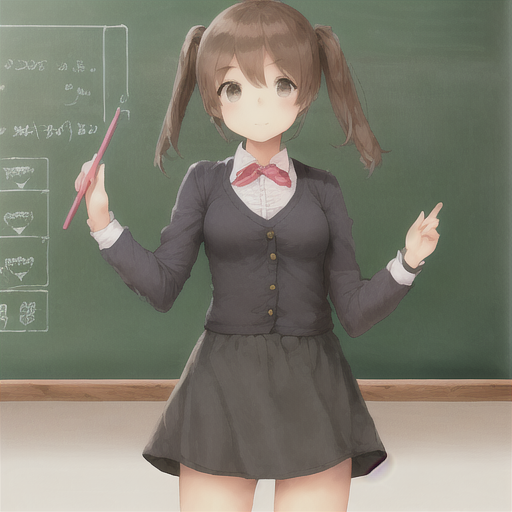

In [13]:
image

### 4. 其他推薦模型

Stable Diffusion 一般生成並沒有另一個有名的文字生圖 AI 模型出色。但 Stable Diffusion 是 open source 的, 所以自己可以訓練自己想要的模型。也有很多人提供不少出色的模型, 比如我們介紹的 Anything v4。可以發現一些好的模型, 在某風格畫得不錯, 所以可以花點時間找到這些模型的強項。這裡再推薦一些不錯的模型, 大家可以試試看。


#### 【1】 Openjourney V2

模型: `prompthero/openjourney-v2`

看名字就知道是打造開放版的 Midjourney, 可以用 Midjourney 的 prompt。但是不要期待真的效果就和 Midjourney 一樣, 不過在某些風格表現得不錯。

範例的 prompt:

	a little girl, beautiful scenery, backlight, bokeh, hundreds of fireflies in the air around them, dramatic light

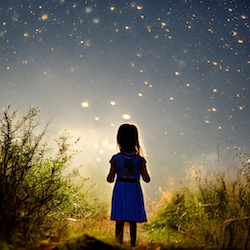

#### 【2】Ghibli Diffusion 吉卜力工作室風格

模型: `nitrosocke/Ghibli-Diffusion`

大家熟悉的吉卜力工作室, 來畫畫這樣風格的插圖吧。

範例 prompt:

	a girl is using a laptop, ghibli style

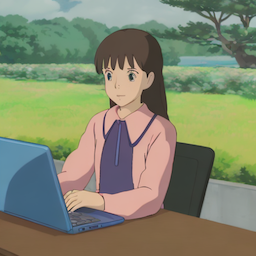

#### 【2】Mo-Di Diffusion 迪士尼風格

模型: `nitrosocke/mo-di-diffusion`

這是 (現代版) 迪士尼風格, 喜歡迪士尼風的快來試試!

範例 prompt:

	a girl in a classroom, modern disney style

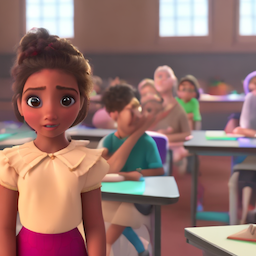